# Visualizations of the Training Process
This notebook showcases the training process of the model. It shows the training loss and measured metrics on the validation set throughout the training process.

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from wiki_connect import DATA_PATH, PLOTS_PATH

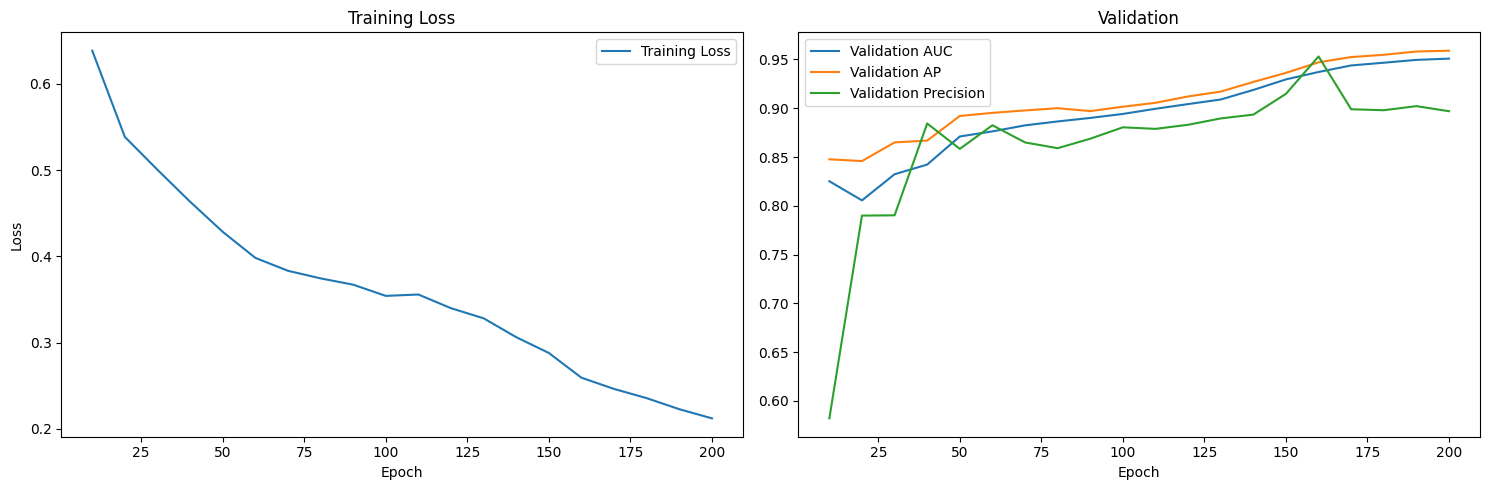

In [2]:
trainings = pd.read_csv(os.path.join(DATA_PATH, "training.csv"))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(trainings["Epoch"], trainings[" Loss"], label="Training Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Training Loss")
ax[0].legend()

ax[1].plot(trainings["Epoch"], trainings[" Val AUC"], label="Validation AUC")
ax[1].plot(trainings["Epoch"], trainings[" Val AP"], label="Validation AP")
ax[1].plot(trainings["Epoch"], trainings[" Val P"], label="Validation Precision")

ax[1].set_xlabel("Epoch")
ax[1].set_title("Validation")
ax[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(PLOTS_PATH, "training.png"))
plt.show()


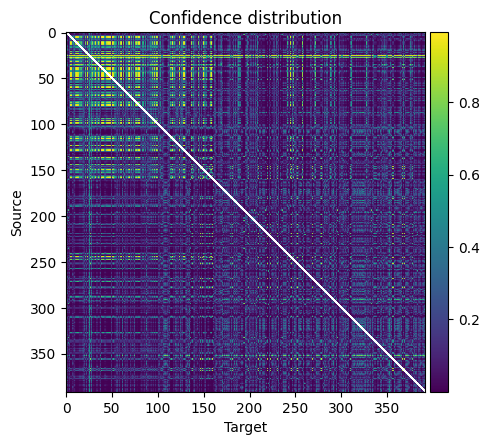

In [3]:
confidence = pd.read_csv(os.path.join(DATA_PATH, "deep_learning_graph_confidence.csv"))
confidences = confidence.pivot(index="source", columns="target", values="confidence")

plt.figure(figsize=(5, 5))
ax = plt.gca()
im = ax.imshow(confidences, cmap="viridis")
plt.title("Confidence distribution")
plt.xlabel("Target")
plt.ylabel("Source")
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax, aspect=10)

plt.tight_layout()
plt.savefig(os.path.join(PLOTS_PATH, "confidence.png"))
plt.show()